In [1]:
import pandas as pd

medals = pd.read_csv('all_medalists.csv')
medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [4]:
# Hangi ülkenin kaç tane madalya aldığını bulalım

print(medals['NOC'].value_counts().head(15))

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
NED     782
JPN     704
CHN     679
RUS     638
ROU     624
Name: NOC, dtype: int64


In [5]:
# pivot_table metodunu kullanarak yukarıdaki bilgiyi daha detaylı elde edebiliriz
counted = medals.pivot_table(index='NOC', columns='Medal', values='Athlete', aggfunc='count')

# Ayrıca bir toplam madalya sütunu ekleyelim
counted['totals'] = counted.sum(axis='columns')

# Toplam madalya sayısına göre sıralayalım
counted = counted.sort_values('totals', ascending=False)

print(counted.head(15))

Medal  Bronze    Gold  Silver  totals
NOC                                  
USA    1052.0  2088.0  1195.0  4335.0
URS     584.0   838.0   627.0  2049.0
GBR     505.0   498.0   591.0  1594.0
FRA     475.0   378.0   461.0  1314.0
ITA     374.0   460.0   394.0  1228.0
GER     454.0   407.0   350.0  1211.0
AUS     413.0   293.0   369.0  1075.0
HUN     345.0   400.0   308.0  1053.0
SWE     325.0   347.0   349.0  1021.0
GDR     225.0   329.0   271.0   825.0
NED     320.0   212.0   250.0   782.0
JPN     270.0   206.0   228.0   704.0
CHN     193.0   234.0   252.0   679.0
RUS     240.0   192.0   206.0   638.0
ROU     282.0   155.0   187.0   624.0


In [7]:
# Verilerde iki tane cinsiyet sütunu varmış gibi duruyor!
medals.head(3)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze


In [8]:
# Unique değerlere bakarak sütunlar arasında fark var mı anlamaya çalışalım.
print('Unique values of Gender: ', medals['Gender'].unique())
print('Unique values of Event Gender: ', medals['Event_gender'].unique())

Unique values of Gender:  ['Men' 'Women']
Unique values of Event Gender:  ['M' 'X' 'W']


In [9]:
# Tekrarlı değerleri düşürerek değer çiftlerine baktığımızda tutarsızlıklar görüyoruz: W, Men gibi...
genders = medals[['Event_gender', 'Gender']].drop_duplicates()
print(genders)

      Event_gender Gender
0                M    Men
348              X    Men
416              W  Women
639              X  Women
23675            W    Men


In [11]:
# Verileri her iki sütun içinde gruplayıp sayılara bakalım
print(medals.groupby(['Event_gender', 'Gender']).count())

                      City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218  


In [ ]:
# Gruplayarak kontrol ettiğimizde sadece bir tane 'W', 'Men' ikilisi görüyoruz.
# Dolayısıyla muhtemelen bir hata söz konusu. Bu satırı bulmak için filtreleme yapabiliriz.

In [15]:
mask = (medals['Event_gender'] == 'W') & (medals['Gender'] == 'Men')
print(medals[mask])

         City  Edition      Sport Discipline            Athlete  NOC Gender  \
23675  Sydney     2000  Athletics  Athletics  CHEPCHUMBA, Joyce  KEN    Men   

          Event Event_gender   Medal  
23675  marathon            W  Bronze  


In [3]:
print("There are ", len(medals['Sport'].unique()), " sports in olympics.")

There are  42  sports in olympics.


In [17]:
# Her bir sporda en başarılı olan ülkeleri gösterelim
by_sport_country = medals.groupby('Sport')
by_sport_country.apply(lambda g:g[['NOC']].mode()).head(10)

NOC
Sport               
Aquatics      0  USA
Archery       0  KOR
              1  USA
Athletics     0  USA
Badminton     0  CHN
Baseball      0  CUB
Basketball    0  USA
Basque Pelota 0  ESP
              1  FRA
Boxing        0  USA

In [20]:
# nunique() metodu bir sütundaki farklı değer sayısını verir. Bu metodu kullanarak her bir ülkenin
# kaç farklı spor dalında madalya kazandığını bulabiliriz.

by_noc = medals.groupby('NOC')
by_noc[['Sport']].nunique().head(10)

,Sport
NOC,
AFG,1
AHO,1
ALG,3
ANZ,5
ARG,17
ARM,3
AUS,22
AUT,16
AZE,4


In [21]:
# Soğuk Savaş yıllarında ABD ve SSCB arasındaki rekabeti inceleyelim.

In [23]:
# Soğuk Savaş yıllarında ABD VE SSCB'nin kaç farklı dalda madalya kazandığına bakalım
during_cold_war = (medals['Edition'] >= 1952) & (medals['Edition'] <= 1988)
usa_or_urs = medals['NOC'].isin(['USA', 'URS'])
cold_war_medals = medals.loc[during_cold_war & usa_or_urs]

cold_war_medals.groupby('NOC')['Sport'].nunique().sort_values(ascending=False).head(10)

NOC
URS    21
USA    20
Name: Sport, dtype: int64

In [24]:
# Yıllara göre en fazla madalya kazanan ülkeleri inceleyelim
# idxmax metodunun Series boyunca en büyük elemanın indisini döndürdüğünü belirtelim
medals_won_by_country = medals.pivot_table(index='Edition', columns='NOC',
                                           values='Athlete', aggfunc='count')

cold_war_by_usa_urs_medals = medals_won_by_country.loc[1952:1988, ['USA', 'URS']]
most_medals = cold_war_by_usa_urs_medals.idxmax(axis='columns')
most_medals.head(10)

Edition
1952    USA
1956    URS
1960    URS
1964    URS
1968    URS
1972    URS
1976    URS
1980    URS
1984    USA
1988    URS
dtype: object

In [34]:
# Görsel analiz yapalım.
import matplotlib.pyplot as plt
%matplotlib inline

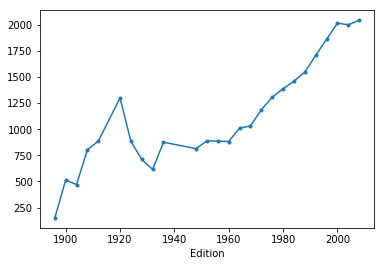

In [28]:
# Olimpiyatlara katılan sporcu sayısının grafiğini oluşturalım
athletes_by_year = medals.groupby('Edition')['Athlete'].count()
athletes_by_year.plot(kind='line', marker='.')

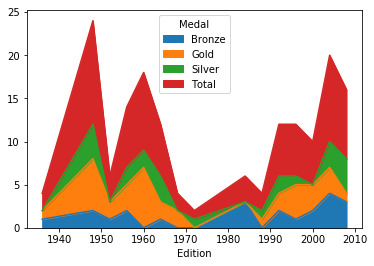

In [57]:
# Türkiyenin yıllara göre aldığı altın, gümüş ve bronz madalyalara bakalım
medals_of_turkey = medals[medals['NOC'] == 'TUR'].pivot_table(index='Edition', columns='Medal',
                                                              values='Athlete', aggfunc='count')

# Toplamı gösteren bir sütun ekleyelim
medals_of_turkey['Total'] = medals_of_turkey.sum(axis='columns')

medals_of_turkey.plot.area()

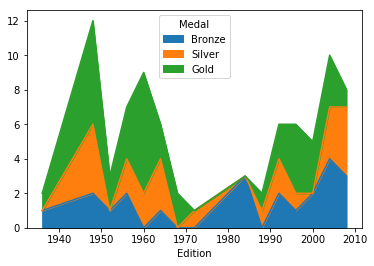

In [59]:
# Madalyalar alfabetik olarak sıralandı. Onun yerine olimpik sıralamayı kullanalım.
medals.Medal = pd.Categorical(values=medals.Medal, categories=['Bronze', 'Silver', 'Gold'],
                              ordered=True)

medals_of_turkey = medals[medals['NOC'] == 'TUR'].pivot_table(index='Edition', columns='Medal',
                                                              values='Athlete', aggfunc='count')

# medals_of_turkey['Total'] = medals_of_turkey.sum(axis='columns')

medals_of_turkey.plot.area()